In [2]:
# from junctionart.roundabout.LogFlow import LogFlow
from junctionart.roundabout.RewardUtil import RewardUtil
from junctionart.roundabout.RoundaboutLaneEncodingEnv import RoundaboutLaneEncodingEnv
from junctionart.roundabout.GFNAgent2 import GFNAgent2
from junctionart.roundabout.FlowFunction import FlowFunction as FF
import math
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

In [2]:
%load_ext autoreload
%autoreload 2

In [23]:
threePoints = [
            {"x": 80, "y": 20, "heading": math.radians(45),'leftLane': 1, 'rightLane': 1, 'medianType': None, 'skipEndpoint': None},
            {"x": 210, "y": 20, "heading": math.radians(115),'leftLane': 1, 'rightLane': 1, 'medianType': None, 'skipEndpoint': None},
        ]
env = RoundaboutLaneEncodingEnv()
agent=GFNAgent2(generatorEnv=env, roadDefinitions = threePoints, vector_Len = 4,N_values = 30,batch_size=10)
ff = FF(4,120)
state= torch.tensor([2, 12, 12, 1])
# state = [1, 11, 11, 0]
# action=torch.zeros(120)
# action[41] = 1
# agent.UpdateState(state,action)
# print(state)
# agent.get_flow_out(state,ff)
agent.step_forward(ff)
agent.step_forward(ff)
agent.step_forward(ff)
agent.step_forward(ff)
agent.CalculateFlowMatchingLoss(ff)

tensor(420.2205, grad_fn=<AddBackward0>)

In [16]:
import torch
import numpy as np
import torch.optim as optim 
import math
import matplotlib.pyplot as plt
import matplotlib
from junctionart.roundabout.RoundaboutLaneEncodingEnv import RoundaboutLaneEncodingEnv
from junctionart.roundabout.GFNAgent2 import GFNAgent2
from junctionart.roundabout.FlowFunction import FlowFunction as FF
from tqdm import tqdm

N_values=30
vector_Len=4
N_epsiodes=2000
threePoints = [
            {"x": 80, "y": 20, "heading": math.radians(45),'leftLane': 1, 'rightLane': 1, 'medianType': None, 'skipEndpoint': None},
            {"x": 210, "y": 20, "heading": math.radians(115),'leftLane': 1, 'rightLane': 1, 'medianType': None, 'skipEndpoint': None},
        ]
env = RoundaboutLaneEncodingEnv()

agent=GFNAgent2(generatorEnv=env, roadDefinitions = threePoints, vector_Len=vector_Len,N_values=N_values,batch_size=32)

Fnet=FF(state_dim=vector_Len, n_embed=vector_Len*N_values)
ff = FF(state_dim = 4, n_embed = vector_Len*N_values)
agent.reset()

optimizer = optim.Adam(Fnet.parameters(), lr=1e-4)


Match_loss_all=[]
AllRewards=[]

for Episode in tqdm(range(N_epsiodes)):
    # print("episode",Episode)
    agent.reset()
    #####forward, build the trajectory
    for step in range(vector_Len):
        states, rewards=agent.step_forward(Fnet)

    #####calculate rewards
    AllRewards.append(rewards.mean().item())

    #####calculate flow match loss
    optimizer.zero_grad()

    Match_loss=agent.CalculateFlowMatchingLoss(Fnet)
    Match_loss_all.append(Match_loss.item())

    Match_loss.backward()

    optimizer.step()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [7:05:46<00:00, 12.77s/it]


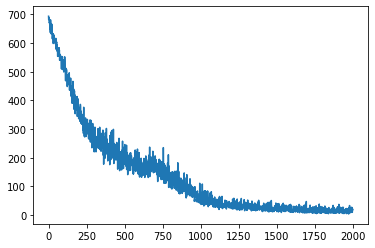

In [17]:
plt.plot(torch.arange(N_epsiodes), Match_loss_all)
# plt.yscale('log')
plt.show()

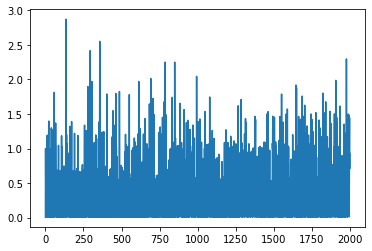

In [18]:
plt.plot(torch.arange(N_epsiodes), AllRewards)
# plt.yscale('log')
plt.show()